# ***Задача 1*** 
***Условие***

Рассматривается система ОДУ первого порядка, имеющая периодическое
решение с периодом 𝑇 :

\begin{cases}
    \alpha'(t) = \theta(t) \\
    \theta'(t) = -\sin\alpha(t) \\
    \alpha(0) = \frac{\pi}{2}, \theta(0) = 0
\end{cases}

где 𝑇 = 4𝐾(𝜋/4), 𝐾(𝜋/4) ≈ 1.854074677301372, 𝐾(𝑚) – эллиптический интеграл первого
рода.

***Решение***

# ***1)*** Реализуем метод Рунге Кутты с данной таблицей Бутчера:


\begin{array}{c|cccc}
0 & & & & \\
\frac{1}{2} & \frac{1}{2} & & & \\
\frac{1}{2} & 0 & \frac{1}{2} & & \\
1 & 0 & 0 & 1 & \\ \hline
 & \frac{1}{6} & \frac{1}{3} & \frac{1}{3} & \frac{1}{6} \\
\end{array}

В коде реализована функция explicit_runge_kutt(a, b, c, n, start, finish, start_val, func)

a, b, c - таблица Бутчера. n - количество шагов, start и finish - начальные данные t, start_val - начальные данные, func - функция f(u, t)
(я взял в качестве агремента функции n, а не h, т.к если задавать h может выйти нецелое количество шагов)

В нашем случае функция func не зависит от агрумента t, явно.





In [40]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Вспомогательная функция
def scal_prod(x, y):
    if len(x) != len(y):
        raise
    return sum([x[i]*y[i] for i in range(len(x))])


def explicit_runge_kutt(a, b, c, n, start, finish, start_val, func):
    h = (finish - start) / n
    val = np.copy(start_val)
    t = start
    for i in range(n):
        val_mid = [val] # промежуточные значения функции
        t_mid = [t] # промежуточные значения времени
        for j in range(1, len(b)):
            t_mid.append(t + c[j] * h)
            val_mid.append(val + h * sum([a[j][k] * func(val_mid[k], t_mid) for k in range(j)]))
        t += h
        dif = [func(val_mid[k], t_mid[k]) for k in range(len(b))]
        val += h * scal_prod(b, dif)
    return val

def func1(x, t):
    return np.array([x[1], -math.sin(x[0])])

a = [
     [0, 0, 0, 0],
     [0.5, 0, 0, 0],
     [0, 1, 0, 0],
     [0, 0, 1, 0]
 ]
b = [1/6, 2/3, 0, 1/6]
c = [0, 0.5, 1, 1]

T = 1.854074677301372 * 4
start_val = np.array([math.pi / 2, 0])
steps = 1000

print(explicit_runge_kutt(a, b, c, steps, 0, T, start_val, func1))

[1.57079642e+00 7.87312555e-08]


# ***2)*** Исследуем на устойчивость теоретически

Все картинки См. "Дз 1, задача 1 - устойчивость".mw.
Найдем положение равновесие системы. Решая систему
\begin{cases}
    \theta(t) = 0 \\
    -\sin\alpha(t) = 0\\
\end{cases}

Получаем решение $ \theta(t) \equiv 0$, $ \alpha(t) \equiv \pi n$, n = целое.

Якобиан правой части по $\theta$, $\alpha$ стационарной точке: $$J = \left( \begin{matrix} 0 & 1 \\ -cos(\alpha(t)) & 0 \end{matrix} \right) = \left( \begin{matrix} 0 & 1 \\ \pm 1 & 0 \end{matrix} \right)$$

$\lambda^2 \pm 1 = 0$. Отсюда собственные значения: $\lambda = \pm i$ или $\lambda = \pm 1$ в зависимости от выбранной стацианарной точки.

Построим область устойчивости для МРК (см График 1).
Область устойчивости внутри полученной области (значение в случайной внутренней точки < 1). 

Построим график $R(z)$ от h в случае $\lambda = \pm i$ (см График 2). Из него следует рекомендованный шаг примерно от 1.6 до 2. Это не соответсвует реальности, как проверено в пункте 4 (при 2 происходит взрыв).

Случай $\lambda = \pm 1$ вовсе не дает ничего, так как выходит растущее решение.

Вывод: линеаризация в данном случае не работает.

# ***3)*** Исследуем метод на порядок аппроксимации и сходимости.

Для начала проверим условии Кутты разных порядков: 

Код реализует функцию order, принимающую на вход таблицу Бутчера, проверяет необходимые условия до 4ого порядка.

Для данной задачи код указывает 3-ий порядок аппроксимации.


In [49]:
def order(a, b, c):
    n = len(c)
    for i in range(n):
        if abs(c[i] - sum(a[i]))  > 10**(-12):
            print("BAD")
            return
    
    if abs(sum(b) - 1) > 10**(-12):
        print("BAD")
        return


    if abs(scal_prod(b, c) - 0.5) > 10**(-12):
        print("1 order")
        return
    

    if abs(sum([b[i]*c[i]*c[i] for i in range(n)]) - 1/3) > 10**(-12):
        print("2 order")
        return
    if abs(sum([b[i]*sum([a[i][j] * c[j] for j in range(n)]) for i in range(n)]) - 1/6) > 10**(-12):
        print("2 order")
        return
        

    if abs(sum([b[i]*c[i]*c[i]*c[i] for i in range(n)]) - 1/4) > 10**(-12):
        print("3 order")
        return
    if abs(sum([b[i]*c[i]*sum([a[i][j] * c[j] for j in range(n)]) for i in range(n)]) - 1/8) > 10**(-12):
        print("3 orderr")
        return
    sm = 0
    for i in range(n):
        for j in range(n):
            for k in range(n):
                sm += b[i] * a[i][j] * a[j][k] * c[k]
    if abs(sm - 1/24) > 10**(-12):
        print("3 orderrr", sm)
        return
    sm = 0
    for i in range(n):
        for j in range(n):
                sm += b[i] * a[i][j] * c[j]**2
    if abs(sm - 1/12) > 10**(-12):
        print("3 orderrrr", sm)
        return
    

    print("min 4 order")

# check forth order table
a = [
     [0, 0, 0, 0],
     [0.5, 0, 0, 0],
     [0, 0.5, 0, 0],
     [0, 0, 1, 0]
 ]
b = [1/6, 1/3, 1/3, 1/6]
c = [0, 0.5, 0.5, 1]

order(a, b, c)

a = [
     [0, 0, 0, 0],
     [0.5, 0, 0, 0],
     [0, 1, 0, 0],
     [0, 0, 1, 0]
 ]
b = [1/6, 2/3, 0, 1/6]
c = [0, 0.5, 1, 1]

order(a, b, c)
# task table

min 4 order
3 orderr


Теперь сравним с порядком сходимости решения эксперементально.

Количество шагов варьируется по двоичному логаримфу. (а конкретно шаги выбраны: 8, 16, 32, ..., $2^{17}$).

Строится график -логаримфа ошибки от -логарифма длины шага.

Как показало МКН наклон прямой очень близок к 3 (3.008, см вывод кода), что совпадает с порядком аппроксимации, как и ожидалось.

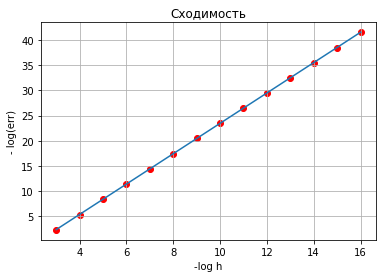

Экспериментальный порядок: k = 3.0082713359403916


In [18]:
m = 14 # Количество точек
nums = [k + 3 for k in range(m)]
pows = [2 ** nums[k] for k in range(m)]
vals = [explicit_runge_kutt(a, b, c, pows[k], 0, T, start_val, func1) for k in range(m)]
log_err = [-math.log2(max(abs(vals[k][0] - start_val[0]), abs(vals[k][1]))) for k in range(m)]
# ошибка по бесконечность норме

n = len(nums)
k = (n * scal_prod(nums, log_err) - sum(nums) * sum(log_err)) / (n * scal_prod(nums, nums) - (sum(nums))**2)
b_koef = (sum(log_err) - k * sum(nums)) / n
line_val = [k * nums[i] + b_koef for i in range(len(nums))]
plt.scatter(nums, log_err, color='red', label='Данные')  # Исходные точки
plt.plot(nums, line_val)  # Прямая МНК

plt.xlabel("-log h")
plt.ylabel("- log(err)")
plt.title("Сходимость")

# 4. Отображаем график
plt.grid(True)  # Добавляем сетку
plt.show()
print(f"Экспериментальный порядок: k = {k}")

# ***4)*** Построим фазовую диаграмму

Теперь функция explicit_runge_kutt_animated(a, b, c, h, start, start_val, func) принимает на вход только начальный момент времени, помимо количества шагов (которое предполагается достаточно большим) - длину шага. Функция рассчитана на анимацию, однако в юпитере она отображается только статично. 

Для запуска и вывода анимации нужно ввести:
animation_html = explicit_runge_kutt_animated(a, b, c, 100, 0.1, 0, start_val, func1)
animation_html

Также у данной функции есть недочет, что анимация устанавливает неправильные значения на оси (так складывается из-за того, что во время анимации оси выставляются по первому шагу и далее не меняются). Этот баг я пофиксить не смог.

Как видно из графиков, что метод неустойчив. Для маленьких шагов это заметно только на больших числах, при шаге h = 1.5 метод выходит из периода уже примерно на 70ом-80ом шаге.

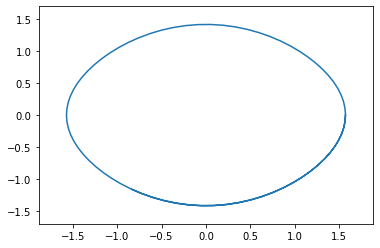

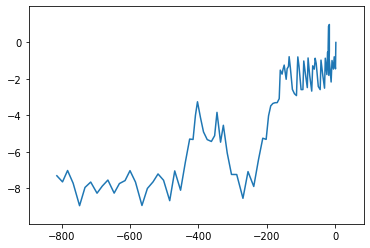

In [23]:


import matplotlib.animation as animation
import time
from IPython.display import HTML

def explicit_runge_kutt_animated(a, b, c, n, h, start, start_val, func):
    # print("pace is: ", h)
    val = np.copy(start_val)
    vals = [np.copy(val)]
    t = start
    for i in range(n):
        val_mid = [val]
        t_mid = [t]
        for j in range(1, len(b)):
            t_mid.append(t + c[j] * h)
            val_mid.append(val + h * sum([a[j][k] * func(val_mid[k], t_mid) for k in range(j)]))
        t += h
        dif = [func(val_mid[k], t_mid[k]) for k in range(len(b))]
        vals.append(np.copy(val))
        val += h * scal_prod(b, dif)

    def animate(frame):
        if frame == 0:
            x_side = max([abs(vals[i][0]) for i in range(len(vals))])
            y_side = max([abs(vals[i][1]) for i in range(len(vals))])
            ax.set_ylim(-y_side * 1,5, y_side * 1,5)
            ax.set_xlim(-x_side * 1,5, x_side * 1,5)
            line.set_ydata([-y_side, y_side])
            line.set_xdata([-x_side, x_side])
            return line,

        x = np.array([vals[i][0] for i in range(frame + 2)])
        y = np.array([vals[i][1] for i in range(frame + 2)])
        line.set_ydata(y)
        line.set_xdata(x)

        # Меняем пределы осей (пример: подстраиваем под текущий максимум и минимум)
        y_min = np.min(y)
        y_max = np.max(y)
        padding = 0.1 * (y_max - y_min)  # Небольшой отступ сверху и снизу
        ax.set_ylim(y_min - padding, y_max + padding) #Установка пределов

        x_min = np.min(x)
        x_max = np.max(x)
        padding = 0.1 * (x_max - x_min)  # Небольшой отступ сверху и снизу
        ax.set_xlim(x_min - padding, x_max + padding) #Установка пределов

        return line,  # Важно: возвращаем изменяемый объект (line,)

    fig, ax = plt.subplots()
    x_side = max([abs(vals[i][0]) for i in range(len(vals))])
    y_side = max([abs(vals[i][1]) for i in range(len(vals))])
    line, = ax.plot([-x_side, x_side], [-y_side, y_side])  # Инициализируем линию графика
    ani = animation.FuncAnimation(fig, animate, frames=n, blit=True, repeat=False, interval=20)
    HTML(ani.to_jshtml())
    plt.show()

animation_html = explicit_runge_kutt_animated(a, b, c, 100, 0.1, 0, start_val, func1)
animation_html

animation_html = explicit_runge_kutt_animated(a, b, c, 100, 2.0, 0, start_val, func1)
animation_html


# ***Задача 3*** 
***Условие***

Рассматривается система ОДУ, описывающая реакции фотохимии озона в
атмосфере:

\begin{cases}
    c_1' =  k_1c_3 - k_2c_1\\
    c_2' = k_1c_3 - k_3c_2c_4\\
    c_3' = k_3c_2c_4 - k_1c_3\\
    c_4' = k_2c_1 - k_3c_2c_4
\end{cases}

$$\bar c(0) = (0, 0, 5\cdot 10^{11}, 8\cdot 10^{11})$$

где  $𝑐 = (𝑐1 , 𝑐2 , 𝑐3 , 𝑐4 )^𝑇$ – концентрации (кол-во молекул вещества в кубическом сантиметре) $𝑂$, $𝑁𝑂$, $𝑁𝑂_2$ и $𝑂_3$ . Выражения для коэффициентов реакций:

$$𝑘_1 = 10^{-2} max [0, sin(\frac{2 \pi t}{t_d} )] s^{-1} $$
$$𝑘_2 = 10^5 𝑠^{−1} , \quad  𝑘_3 = 10^{−16} cm^3 \cdot molecule^{−1} \cdot s^{−1},  \quad 𝑡_𝑑 = 24 · 60 · 60 s$$

***Решение***

1) Найдем численное решение при помощи НМРК.

Пока код выдает лажу.

0.0 0.0 0.0
0.0 0.0 0.0
15707937.429397818 0.0 0.0
0.0 0.0 0.0
15707937.429397818 0.0 0.0
31330447.147112705 135716579389997.16 108573.2635119977
0.0 0.0 0.0
15707937.429397818 0.0 0.0
31330447.147112705 135716579389997.16 108573.2635119977
31246227.627183557 -1.1725909752345123e+21 3163362657.2394953
34192724.90996384 1.688531004337833e+27 7.462918573789507e+16
34192724.90996384 1.688531004337833e+27 7.462918573789507e+16
303848586953762.7 -7.294452250208435e+33 -2.35171744859427e+31
34192724.90996384 1.688531004337833e+27 7.462918573789507e+16
303848586953762.7 -7.294452250208435e+33 -2.35171744859427e+31
-2.5532733818947828e+29 6.302406744180257e+40 -1.276447312004221e+53
34192724.90996384 1.688531004337833e+27 7.462918573789507e+16
303848586953762.7 -7.294452250208435e+33 -2.35171744859427e+31
-2.5532733818947828e+29 6.302406744180257e+40 -1.276447312004221e+53
-1.385846308653979e+51 -5.445279426993803e+47 1.2162791758806105e+94
2.200869019210607e+91 -1.9948345642242424e+57 3.06754

<ipython-input-12-97eb4ee504de>:60: RuntimeWarning: overflow encountered in double_scalars
  a_3 = k[2]*c[1]*c[3]
<ipython-input-12-97eb4ee504de>:74: RuntimeWarning: invalid value encountered in multiply
  val_mid.append(val + h * sum([a[j][k] * func(val_mid[k], t_mid[k]) for k in range(j)]))
<ipython-input-12-97eb4ee504de>:62: RuntimeWarning: invalid value encountered in double_scalars
  return np.copy(np.array([a_1 - a_2, a_1 - a_3, a_3 - a_1, a_2 - a_3]))
<ipython-input-12-97eb4ee504de>:10: RuntimeWarning: invalid value encountered in multiply
  return sum([x[i]*y[i] for i in range(len(x))])



nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan

ValueError: Axis limits cannot be NaN or Inf

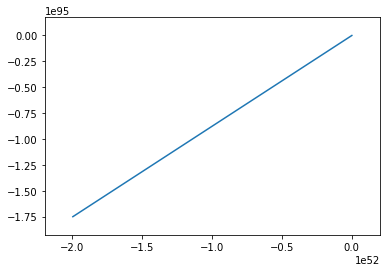

In [ ]:
from scipy.optimize import fsolve
import math
import numpy as np
import matplotlib.pyplot as plt

# Вспомогательная функция
def scal_prod(x, y):
    if len(x) != len(y):
        raise
    return sum([x[i]*y[i] for i in range(len(x))])


def implicit_runge_kutt(a, b, c, n, start, finish, start_val, func):
    h = (finish - start) / n
    val = np.copy(start_val)
    t = start
    for i in range(n):
        val_mid = [val] # промежуточные значения функции
        t_mid = [t] # промежуточные значения времени
        for j in range(1, len(b)):
            t_mid.append(t + c[j] * h)
            const1 = val + h * sum([a[j][k] * func(val_mid[k], t_mid[k]) for k in range(j)])
            # print("const:", const1)
            def equation(x):
                return x - func(x, t + c[j] * h) * a[j][j] - const1
            slve = fsolve(equation, x0=val)
            print(f"solve: {slve}, solve_prec: {slve - func(slve, t + c[j] * h) * a[j][j] - const1}")
            val_mid.append(np.copy(slve))
        t += h
        dif = [func(val_mid[k], t_mid[k]) for k in range(len(b))]
        # print("bubu: ", h, scal_prod(b, dif))
        val += h * scal_prod(b, dif)
        print(f"time: {t}")
        print(f"dif: {dif}")
        print("val: ", val)
    return val


def euler_method(n, start, finish, srart_val, func):
    h = (finish - start) / n
    val = np.copy(srart_val)
    t = start
    for i in range(n):
        val += h * func(val, t)
        print(f"time: {t}")
        print("val: ", val)
        t += h
    return val


def k_1(t):
    return 0.01 * max(0, math.sin(2*math.pi*t/(24*60*60)))

k = [k_1, 10**5, 10**(-16)]


def func2(c, t):
    a_1 = k[0](t)*c[2]
    a_2 = k[1] * c[0]
    a_3 = k[2]*c[1]*c[3]
    # print(a_1, a_2, a_3)
    return np.copy(np.array([a_1 - a_2, a_1 - a_3, a_3 - a_1, a_2 - a_3]))

def explicit_runge_kutt_animated(a, b, c, n, h, start, start_val, func):
    # print("pace is: ", h)
    val = np.copy(start_val)
    vals = [np.copy(val)]
    t = start
    for i in range(n):
        val_mid = [val]
        t_mid = [t]
        for j in range(1, len(b)):
            t_mid.append(t + c[j] * h)
            val_mid.append(val + h * sum([a[j][k] * func(val_mid[k], t_mid[k]) for k in range(j)]))
        t += h
        dif = [func(val_mid[k], t_mid[k]) for k in range(len(b))]
        vals.append(np.copy(val))
        val += h * scal_prod(b, dif)

    def animate(frame):
        if frame == 0:
            x_side = max([abs(vals[i][0]) for i in range(len(vals))])
            y_side = max([abs(vals[i][1]) for i in range(len(vals))])
            ax.set_ylim(-y_side * 1,5, y_side * 1,5)
            ax.set_xlim(-x_side * 1,5, x_side * 1,5)
            line.set_ydata([-y_side, y_side])
            line.set_xdata([-x_side, x_side])
            return line,

        x = np.array([vals[i][0] for i in range(frame + 2)])
        y = np.array([vals[i][1] for i in range(frame + 2)])
        line.set_ydata(y)
        line.set_xdata(x)

        # Меняем пределы осей (пример: подстраиваем под текущий максимум и минимум)
        y_min = np.min(y)
        y_max = np.max(y)
        padding = 0.1 * (y_max - y_min)  # Небольшой отступ сверху и снизу
        ax.set_ylim(y_min - padding, y_max + padding) #Установка пределов

        x_min = np.min(x)
        x_max = np.max(x)
        padding = 0.1 * (x_max - x_min)  # Небольшой отступ сверху и снизу
        ax.set_xlim(x_min - padding, x_max + padding) #Установка пределов

        return line,  # Важно: возвращаем изменяемый объект (line,)

    fig, ax = plt.subplots()
    x_side = max([abs(vals[i][0]) for i in range(len(vals))])
    y_side = max([abs(vals[i][1]) for i in range(len(vals))])
    line, = ax.plot([-x_side, x_side], [-y_side, y_side])  # Инициализируем линию графика
    ani = animation.FuncAnimation(fig, animate, frames=n, blit=True, repeat=False, interval=20)
    HTML(ani.to_jshtml())
    plt.show()

# a = [
#      [1, 0, 0],
#      [0, 1/3, 1],
#      [-1/12, 3/4, 1/3]
# ]
# b = [-1/12, 3/4, 1/3]
# c = [1, 1/3, 1]

a = [
     [0, 0, 0, 0],
     [0.5, 0, 0, 0],
     [0, 1, 0, 0],
     [0, 0, 1, 0]
 ]
b = [1/6, 2/3, 0, 1/6]
c = [0, 0.5, 1, 1]

T = 24 * 60 * 60.0
start_val = np.array([0.0, 0.0, 5e11, 8e11], dtype=np.float64)
steps = 10000

animation_html = explicit_runge_kutt_animated(a, b, c, 1000, T / 1000, 0, start_val, func2)
animation_html
# print(euler_method(steps, 0, T * 2, start_val, func2))